<a href="https://colab.research.google.com/github/dansainthedark/pokemon_name_plot/blob/main/pokemon_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ポケモンのデータセットから音象徴を確認する

## 参考書籍
- フリースタイル言語学
  - https://www.amazon.co.jp/dp/B0B1PT6QYM/

## データセット
- The Complete Pokemon Dataset
  - https://www.kaggle.com/datasets/rounakbanik/pokemon?resource=download

## とりあえず日本語名の濁音の数と個体のサイズの相関について

# Introduction

## 濁音がついていると強そうに聞こえる
e.g
- ガンダム > カンタム
- ゴジラ > コシラ

ポケモンは進化すると濁音が増える傾向にある
- イワーク -> ハガネール
- ゴースト -> ゲンガー

濁音の発声時に口腔内がひろがり、口腔内を響かせることと関連があるっぽい

## 文字数が多いほど進化後の可能性が高い
- ピチュー -> ピカチュー

# 前準備

## CSVのインポート
1. [kaggle](https://www.kaggle.com/datasets/rounakbanik/pokemon?resource=download)からデータセットをダウンロードし、解凍する
2. Colabで読み込む


In [35]:
from google.colab import files

csv = files.upload()

Saving pokemon.csv to pokemon (1).csv


# データの概要を確認

In [36]:
import pandas as pd

df = pd.read_csv('./pokemon.csv')
display(df)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [37]:
df.columns.values

array(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation',
       'is_legendary'], dtype=object)

In [38]:
df.loc[:,['name','japanese_name','height_m','weight_kg']]

,name,japanese_name,height_m,weight_kg
0,Bulbasaur,Fushigidaneフシギダネ,0.7,6.9
1,Ivysaur,Fushigisouフシギソウ,1.0,13.0
2,Venusaur,Fushigibanaフシギバナ,2.0,100.0
3,Charmander,Hitokageヒトカゲ,0.6,8.5
4,Charmeleon,Lizardoリザード,1.1,19.0
...,...,...,...,...
796,Celesteela,Tekkaguyaテッカグヤ,9.2,999.9
797,Kartana,Kamiturugiカミツルギ,0.3,0.1
798,Guzzlord,Akuzikingアクジキング,5.5,888.0
799,Necrozma,Necrozmaネクロズマ,2.4,230.0


In [39]:
# アルファベットと日本語文字列の分離
import re

df['japanese_name_romaji'] = df['japanese_name'].map(lambda x: re.sub(r"[^a-zA-Z]", "", x))
df['japanese_name_kana'] = df['japanese_name'].map(lambda x: re.sub(r"[a-zA-Z]", "", x))

In [40]:
# 文字数カラム追加
df['japanese_name_length'] = df['japanese_name_kana'].map(lambda name: len(name))

In [ ]:
# 濁音の文字数カラム追加

# !pip install jaconv
# import jaconv

# def remove_diacritical_mark(text):
#   text_list = map(lambda s: jaconv.h2z(jaconv.z2h(s)[0]), list(text))
#   return ''.join(text_list)

# def count_list_diff(l1,l2):
#   diff = list(filter(lambda x: x not in l2, l1))
#   return len(diff) 

# count_diacritical_mark = lambda text: count_list_diff(text, remove_diacritical_mark(text))

# df['diacritical_mark_count'] = df['japanese_name_kana'].map(count_diacritical_mark)

In [42]:
import unicodedata

text='フシギダネ'
def count_diacritical_mark(text):
  bytes_text = text.encode('utf-8')
  bytes_text = unicodedata.normalize('NFD', bytes_text.decode('utf-8')).encode('utf-8')
  diacritical_mark_list = re.findall(b"\xe3\x82\x99", bytes_text)
  return len(diacritical_mark_list)

df['diacritical_mark_count'] = df['japanese_name_kana'].map(count_diacritical_mark)

In [43]:
df_pokemon_name = df.loc[:,['japanese_name_romaji','japanese_name_kana','japanese_name_length','diacritical_mark_count','height_m','weight_kg']]
df_pokemon_name

,japanese_name_romaji,japanese_name_kana,japanese_name_length,diacritical_mark_count,height_m,weight_kg
0,Fushigidane,フシギダネ,5,2,0.7,6.9
1,Fushigisou,フシギソウ,5,1,1.0,13.0
2,Fushigibana,フシギバナ,5,2,2.0,100.0
3,Hitokage,ヒトカゲ,4,1,0.6,8.5
4,Lizardo,リザード,4,2,1.1,19.0
...,...,...,...,...,...,...
796,Tekkaguya,テッカグヤ,5,1,9.2,999.9
797,Kamiturugi,カミツルギ,5,1,0.3,0.1
798,Akuziking,アクジキング,6,2,5.5,888.0
799,Necrozma,ネクロズマ,5,1,2.4,230.0


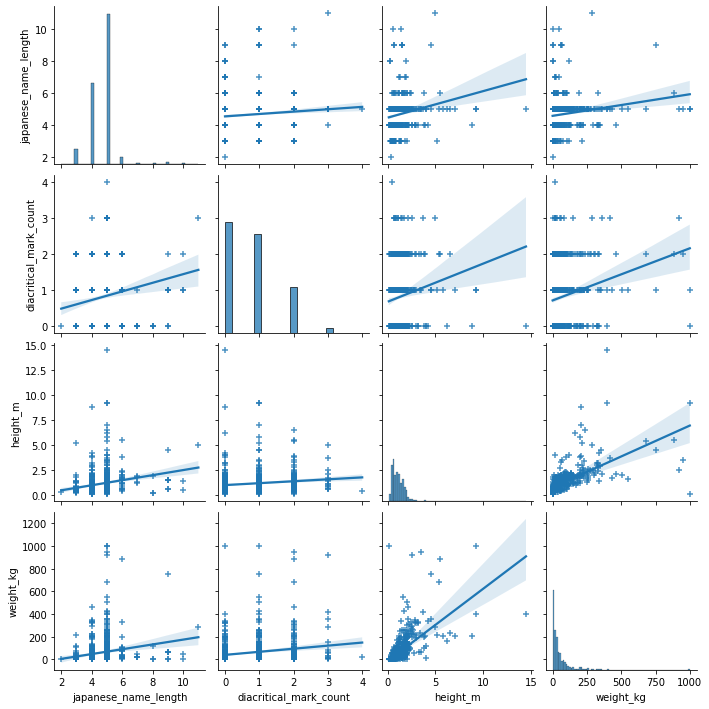

In [44]:
import seaborn as sns

sns.pairplot(df_pokemon_name, kind='reg', markers='+', palette='Blues')

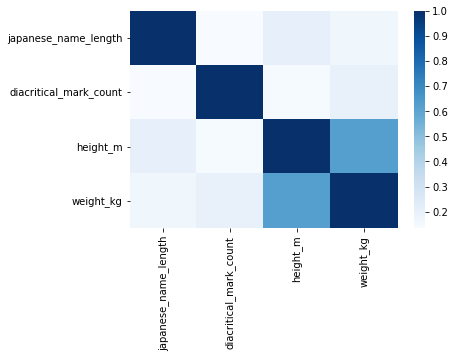

In [45]:
sns.heatmap(df_pokemon_name.corr(), cmap='Blues')

他にも
- 「い」より「あ」が使われている名前の方が大きい印象を受ける
  - 発音時の口の開く大きさが関係しているらしい

- タイプ種別によって使われる音に傾向がある
  - ひこうタイプ ->「サ行」
  - あくタイプ -> 「濁音」

- 発声との関連もあるようなのでlibrosa等で音声スペクトラムを解析してみても面白そう
  - 文字として同じ音でも実際の発声では前後の文字やイントネーションで変わるはずなのでさらに細かい分析ができるかもしれない